In [1]:
import pygmt
import pandas as pd

datasets = pd.read_csv('./database.csv')
datasets.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

Render time: 8.909698228s


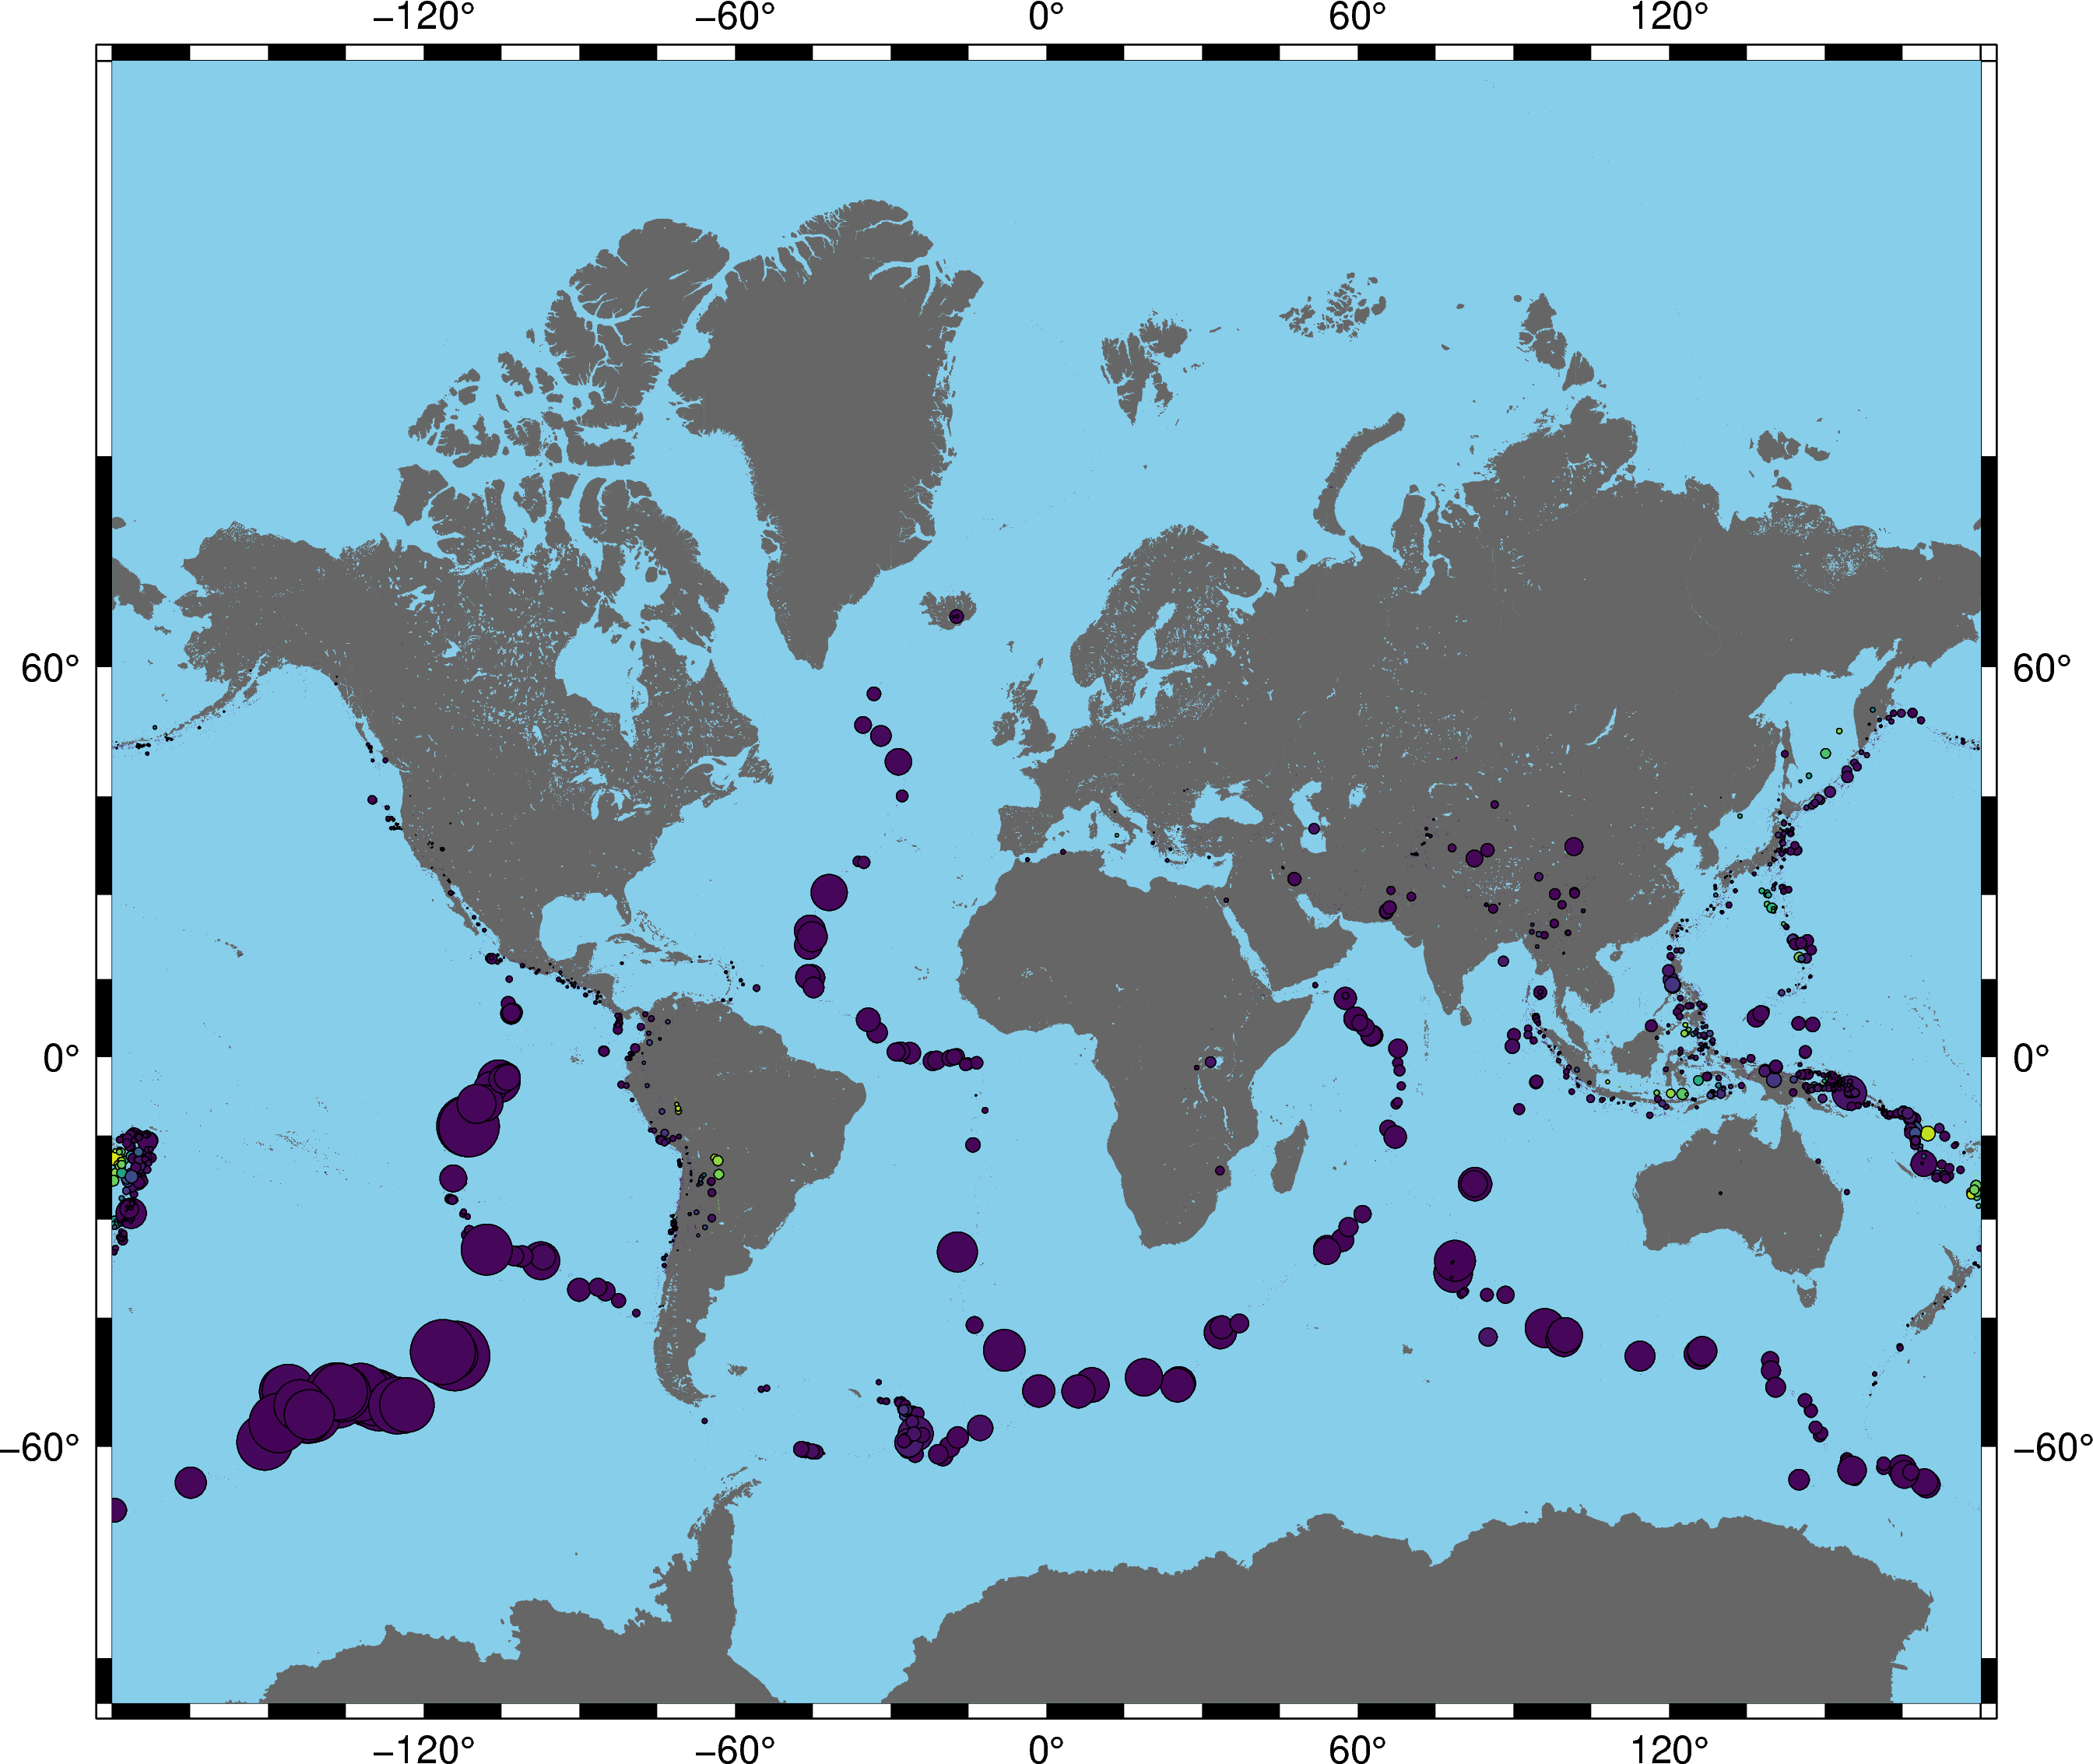

In [3]:
import time

start_time = time.process_time()

fig = pygmt.Figure()

longitudes = datasets['Longitude']
latitudes = datasets['Latitude']
depths = datasets['Depth']

region = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]
fig.basemap(region=region, projection='M8i', frame=True)
fig.coast(land='#666666', water='skyblue', resolution='h')
fig.plot(x=longitudes, y=latitudes, 
        style='cc', pen="black",
        sizes=datasets['Horizontal Distance'] / 50,
        cmap='viridis', color=depths / depths.max())
end_time = time.process_time()
print('Render time: {}s'.format(end_time - start_time))
fig.show()
